In [1]:
# dataset from https://www.kaggle.com/datasets/atharvaarya25/e-commerce-analysis-uk
# previous work from 'Cleaning Data.ipynb'

# importing libraries for exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
import statistics
import seaborn as sns

In [2]:
# reading our cleaned data
sales_data = pd.read_csv('sales_data.csv', dtype={
    'CustomerID': 'object'  
})

# checking if all data has the correct types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        541909 non-null  object 
 1   InvoiceDatetime  541909 non-null  object 
 2   BaseDate         541909 non-null  object 
 3   BaseDay          541909 non-null  int64  
 4   BaseDayOfWeek    541909 non-null  int64  
 5   BaseMonth        541909 non-null  int64  
 6   BaseYear         541909 non-null  int64  
 7   CustomerID       541909 non-null  object 
 8   StockCode        541909 non-null  object 
 9   Description      541909 non-null  object 
 10  Quantity         541909 non-null  int64  
 11  UnitPrice        541909 non-null  float64
 12  Country          541909 non-null  object 
 13  ItemTotalPrice   541909 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 57.9+ MB


In [3]:
# taking a look again at our data
sales_data.head()

,InvoiceNo,InvoiceDatetime,BaseDate,BaseDay,BaseDayOfWeek,BaseMonth,BaseYear,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,ItemTotalPrice
0,536365,2010-12-01 08:26:00,2010-12-01,1,2,12,2010,17850,85123A,White Hanging Heart T-Light Holder,6,2.55,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,1,2,12,2010,17850,71053,White Metal Lantern,6,3.39,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,1,2,12,2010,17850,84406B,Cream Cupid Hearts Coat Hanger,8,2.75,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,1,2,12,2010,17850,84029G,Knitted Union Flag Hot Water Bottle,6,3.39,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,1,2,12,2010,17850,84029E,Red Woolly Hottie White Heart.,6,3.39,United Kingdom,20.34


In [4]:
# how many unique data we have for each column?
sales_data.nunique()

InvoiceNo          25900
InvoiceDatetime    23260
BaseDate             305
BaseDay               31
BaseDayOfWeek          6
BaseMonth             12
BaseYear               2
CustomerID          4373
StockCode           4070
Description         4207
Quantity             722
UnitPrice           1630
Country               38
ItemTotalPrice      5998
dtype: int64

In [5]:
# how many sales we had each year?
revenue_by_year = pd.DataFrame(sales_data.groupby(['BaseYear'])['ItemTotalPrice'].sum().reset_index(name='TotalRevenue'))
revenue_by_year

,BaseYear,TotalRevenue
0,2010,7.489570e+05
1,2011,8.998791e+06


<AxesSubplot:xlabel='BaseYear'>

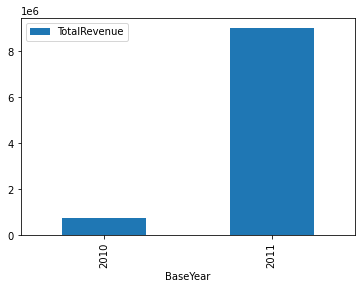

In [6]:
# Let's explore what this means with visualization
revenue_by_year.plot(x='BaseYear', y='TotalRevenue', kind='bar')

In [7]:
# so our base has a majority of data from 2011, or 2010 really wasn't a good year.

# how many sales we had each month and each year?

revenue_by_month = pd.DataFrame(sales_data.groupby(['BaseYear', 'BaseMonth'])['ItemTotalPrice'].sum().reset_index(name='TotalRevenue'))

revenue_by_month.sort_values(['BaseYear', 'BaseMonth'], ascending = [True, True])

,BaseYear,BaseMonth,TotalRevenue
0,2010,12,748957.020
1,2011,1,560000.260
2,2011,2,498062.650
3,2011,3,683267.080
4,2011,4,493207.121
5,2011,5,723333.510
6,2011,6,691123.120
7,2011,7,681300.111
8,2011,8,682680.510
9,2011,9,1019687.622


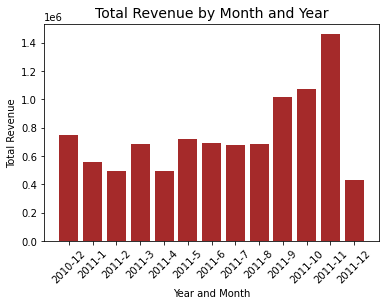

In [8]:
# so our data for 2010 is incomplete. Let's see the diference in revenue with a chart

# compacting year and month to make the chart
revenue_by_month['YearMonth'] = revenue_by_month[['BaseYear', 'BaseMonth']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# imputing the specifics to the chart

plt.bar(revenue_by_month['YearMonth'], revenue_by_month['TotalRevenue'], color= 'brown')
plt.title('Total Revenue by Month and Year', fontsize=14)
plt.xlabel('Year and Month', fontsize=10)
plt.xticks(rotation=45)
plt.ylabel('Total Revenue', fontsize=10)
plt.grid(False)
plt.show()



[Text(-50.0, 0, '2011-10-13'),
 Text(0.0, 0, '2010-12-01'),
 Text(50.0, 0, '2011-02-08'),
 Text(100.0, 0, '2011-04-07'),
 Text(150.0, 0, '2011-06-12'),
 Text(200.0, 0, '2011-08-09'),
 Text(250.0, 0, '2011-10-07'),
 Text(300.0, 0, '2011-12-05'),
 Text(350.0, 0, '')]

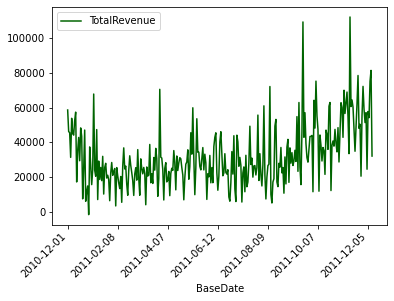

In [9]:
# how is the revenue per day?
revenue_by_day = pd.DataFrame(sales_data.groupby(['BaseDate'])['ItemTotalPrice'].sum().reset_index(name='TotalRevenue'))
revenue_by_day


chart_revenue_by_day = revenue_by_day.plot(x='BaseDate', y='TotalRevenue', kind='line', color='darkgreen')

chart_revenue_by_day.set_xticklabels(chart_revenue_by_day.get_xticklabels(), rotation=45, ha='right')

In [10]:
# how much has each customer paid?
# total_per_customer = sales_data.groupby(['CustomerID'])['ItemTotalPrice'].sum().reset_index(name='Total Purchases')

# removing results where CustomerID = 0
# filtered_total_per_customer = total_per_customer.loc[total_per_customer['CustomerID'] > 0]
# filtered_total_per_customer

total_per_customer = sales_data.groupby('CustomerID').agg(
    TotalOrders=('InvoiceNo', 'nunique')
    , TotalRevenue=('ItemTotalPrice', 'sum')
).reset_index()

# avg ticket per CustomerID
total_per_customer['AvgTicket'] = total_per_customer['TotalRevenue'] // total_per_customer['TotalOrders']

# removing customers that have more refunds than purchases
total_per_customer = total_per_customer[total_per_customer['AvgTicket'] > 0]

# removing customers without actual orders
total_per_customer = total_per_customer[total_per_customer['TotalOrders'] > 0]

total_per_customer

,CustomerID,TotalOrders,TotalRevenue,AvgTicket
0,0,3710,1447682.12,390.0
2,12347,7,4310.00,615.0
3,12348,4,1797.24,449.0
4,12349,1,1757.55,1757.0
5,12350,1,334.40,334.0
...,...,...,...,...
4368,18280,1,180.60,180.0
4369,18281,1,80.82,80.0
4370,18282,3,176.60,58.0
4371,18283,16,2094.88,130.0


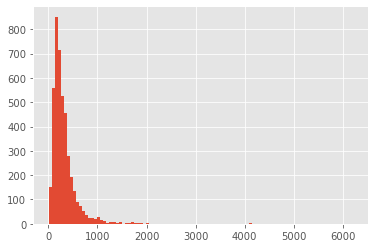

In [11]:
# how is the distribution of avg tickets?

plt.style.use('ggplot')
plt.hist(total_per_customer['AvgTicket'], bins=100)
plt.show()

In [12]:
# Let's take a look closer at our AvgTicket basic stats
total_per_customer['AvgTicket'].describe()

count    4317.000000
mean      322.123234
std       351.414723
min         3.000000
25%       154.000000
50%       240.000000
75%       373.000000
max      6207.000000
Name: AvgTicket, dtype: float64

In [13]:
# how much is the data skewed?
print(skew(total_per_customer['AvgTicket']))

6.700816316700165


In [14]:
# the data is skewed to the right, as predictable by the type of data we're looking, but it has some outliers. 

# Let's remove them with Interquartile Range (IQR) and see how the average customer behaves

# calculating the 1st and 3rd percentiles
Q1 = total_per_customer['AvgTicket'].quantile(0.25)
Q3 = total_per_customer['AvgTicket'].quantile(0.75)

# calculating the IQR
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = total_per_customer[(total_per_customer['AvgTicket'] < Q1 - threshold * IQR) | (total_per_customer['AvgTicket'] > Q3 + threshold * IQR)]

# dropping outliers
total_per_customer2 = total_per_customer.drop(outliers.index)

# taking a look at the new values without the outliers
total_per_customer2.describe()

,TotalOrders,TotalRevenue,AvgTicket
count,4039.000000,4.039000e+03,4039.000000
mean,5.966576,1.755775e+03,258.236197
std,59.025633,2.302125e+04,143.179605
min,1.000000,3.750000e+00,3.000000
25%,1.000000,2.874950e+02,150.000000
50%,3.000000,6.051200e+02,227.000000
75%,6.000000,1.433490e+03,341.000000
max,3710.000000,1.447682e+06,701.000000


In [15]:
total_per_customer2['AvgTicket'].describe()

count    4039.000000
mean      258.236197
std       143.179605
min         3.000000
25%       150.000000
50%       227.000000
75%       341.000000
max       701.000000
Name: AvgTicket, dtype: float64

In [16]:
# it looks better, since there's not that much difference between 75th percentile and max value
# how it's the skew now?

print(skew(total_per_customer2['AvgTicket']))

0.8340454181629414


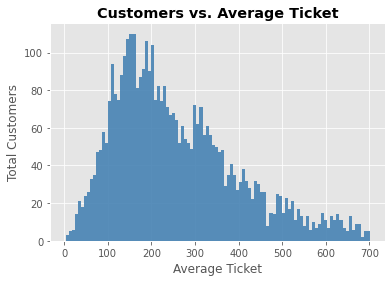

In [17]:
# much better. Not that disturbed, but still distributed "to the left"
# and how it reflects in out histogram now?

# Histogram plot 1
plt.hist(total_per_customer2['AvgTicket'], 
         bins=100, 
         color='steelblue', 
         alpha=0.9)

# plotting titles, axis and legend
plt.title('Customers vs. Average Ticket', fontweight = "bold")
plt.xlabel('Average Ticket')
plt.ylabel('Total Customers')

plt.show()

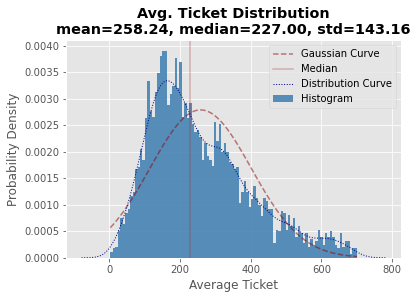

In [18]:
# Let's see the distributions and probability densities

# Histogram plot 2
plt.hist(total_per_customer2['AvgTicket'], 
         density=True, 
         bins=100, 
         color='steelblue', 
         alpha=0.9,
         label='Histogram')

# Gaussian distribution curve
mean = np.mean(total_per_customer2['AvgTicket'])
median = np.median(total_per_customer2['AvgTicket'])
std = np.std(total_per_customer2['AvgTicket'])
x = np.linspace(total_per_customer2['AvgTicket'].min(), total_per_customer2['AvgTicket'].max(), 100)
plt.plot(x, stats.norm.pdf(x, mean, std),
         color='darkred', 
         linestyle='--', 
         label='Gaussian Curve', 
         alpha=0.5)
plt.axvline(x=median, color='brown', alpha=0.3, label='Median')

# Kernel Distribution Estimation Plot
sns.kdeplot(total_per_customer2['AvgTicket'], color="darkblue", linewidth=1, linestyle='dotted', label='Distribution Curve')

# plotting titles, axis and legend
plt.title(f'Avg. Ticket Distribution\nmean={mean:.2f}, median={median:.2f}, std={std:.2f}', fontweight = "bold")
plt.xlabel('Average Ticket')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

In [19]:
"""
The chart shows how skewed is this distribution, and how most customers are below the global average. 
Above the median, we have a slightly indication that, the more the price rises, less customers we have.
But, below the median, we have a different behavior, and we can think of product combinations within that limit.

Let's see how strong is the correlation between the average ticket and total customers, looking above and below the avg
"""

# new dataframe to group the customers
customers_per_avg_ticket = total_per_customer2[['CustomerID', 'AvgTicket']]
ticket_and_customer_corr = customers_per_avg_ticket.groupby(['AvgTicket']).count().reset_index()
ticket_and_customer_corr.columns = ['AvgTicket', 'TotalRevenue']

# all population correlation
ticket_and_customer_corr.corr()

,AvgTicket,TotalRevenue
AvgTicket,1.000000,-0.571042
TotalRevenue,-0.571042,1.000000


In [20]:
# above median
ticket_and_customer_corr[ticket_and_customer_corr['AvgTicket'] > median].corr()

,AvgTicket,TotalRevenue
AvgTicket,1.000000,-0.761119
TotalRevenue,-0.761119,1.000000


In [21]:
# above average
ticket_and_customer_corr[ticket_and_customer_corr['AvgTicket'] > mean].corr()

,AvgTicket,TotalRevenue
AvgTicket,1.00000,-0.73694
TotalRevenue,-0.73694,1.00000


In [22]:
# below median
ticket_and_customer_corr[ticket_and_customer_corr['AvgTicket'] < median].corr()

,AvgTicket,TotalRevenue
AvgTicket,1.000000,0.685895
TotalRevenue,0.685895,1.000000


In [23]:
"""
From the above statements, we see that there's a negative correlation between average ticket and total customers.
The higher is the average ticket, the lower is the total customers we have for that ticket.
When we look at the values above the average and the median, this negative correlation is more intense.

When we look at the values below the median, there is a strong positive correlation. 
This could mean we have an opportunity to explore 
    how to have more customers while still have products and basket products around the average ticket.
    
Finally, let's explore if there's some correlation between average tickets and total orders.
"""

"\nFrom the above statements, we see that there's a negative correlation between average ticket and total customers.\nThe higher is the average ticket, the lower is the total customers we have for that ticket.\nWhen we look at the values above the average and the median, this negative correlation is more intense.\n\nWhen we look at the values below the median, there is a strong positive correlation. \nThis could mean we have an opportunity to explore \n    how to have more customers while still have products and basket products around the average ticket.\n    \nFinally, let's explore if there's some correlation between average tickets and total orders.\n"

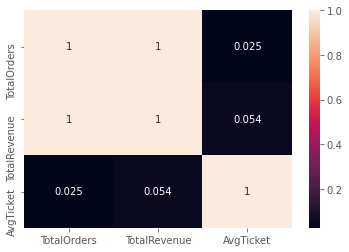

In [24]:
# dataframe without CustomerId
corr_expenses = total_per_customer2[['TotalOrders', 'TotalRevenue', 'AvgTicket']]

# making a visualization with those correlations
sns.heatmap(corr_expenses.corr(), annot=True)
plt.show()

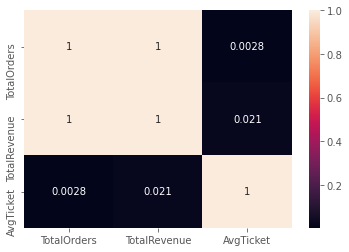

In [25]:
# there's no strong correlation looking at the global population
# check the correlation between avg. ticket and customers above the median
corr_expenses_above = corr_expenses[corr_expenses['AvgTicket'] > mean]
sns.heatmap(corr_expenses_above.corr(), annot=True)
plt.show()

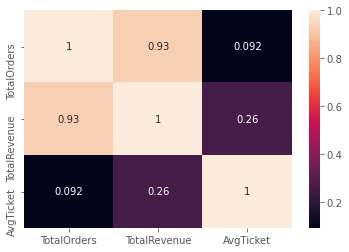

In [26]:
# there's no strong correlation looking at customers above the median
# check the correlation between avg. ticket and customers below the median
corr_expenses_above = corr_expenses[corr_expenses['AvgTicket'] < mean]
sns.heatmap(corr_expenses_above.corr(), annot=True)
plt.show()

In [27]:
"""
There's no strong correlation between average tickets and total orders. 
That means a lot of customers have purchasing habits around the average ticket, but there's no indication of 
    total orders and average expense. 
So we have a lot of opportunities to increase this correlation by estimulating purchasing habits.


Possible further next steps from here would be:
- plot a dashboard so all key stakeholders can analyse the results
- deep dive into customer data, like purchase frequency, location and MRR
- measure product sales with avg. ticket from 100 to 200
- segment our customers 
- have product recommendations to suggest new purchases
- check which products are commonly sold together
- predict customer churn
- predict sales revenue for the next theoretical year
- product price prediction
"""

"\nThere's no strong correlation between average tickets and total orders. \nThat means a lot of customers have purchasing habits around the average ticket, but there's no indication of \n    total orders and average expense. \nSo we have a lot of opportunities to increase this correlation by estimulating purchasing habits.\n\n\nPossible further next steps from here would be:\n- plot a dashboard so all key stakeholders can analyse the results\n- deep dive into customer data, like purchase frequency, location and MRR\n- measure product sales with avg. ticket from 100 to 200\n- segment our customers \n- have product recommendations to suggest new purchases\n- check which products are commonly sold together\n- predict customer churn\n- predict sales revenue for the next theoretical year\n- product price prediction\n"